In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Part 1
data = pd.read_csv('Instagram-Reach.csv')

# Convert to DateTime
data['Date'] = pd.to_datetime(data['Date'])

# Get Days of week and group by week
data['Day'] = data['Date'].dt.day_name()
dataDay = data.groupby('Day')['Instagram reach'].sum()
# Setting order of days correct
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dataDay = dataDay.reindex(ordered_days)
d30 = data[:30] # 30 days data

In [ ]:
# Data Info
data.head() # Checks for first 5 columns
data.isnull().sum()
data.describe()
data.info()

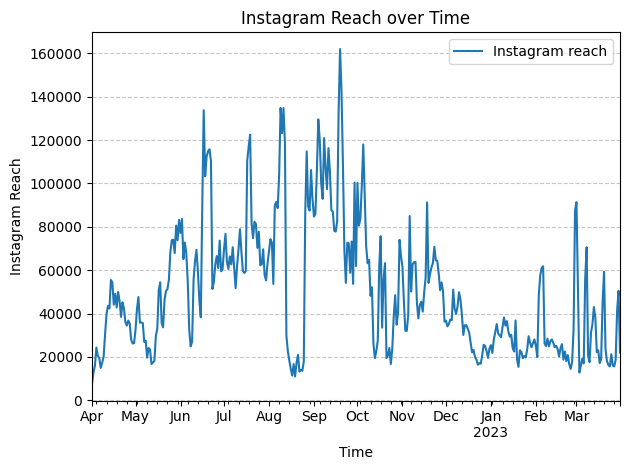

In [33]:
# Line Plot
data.plot(x='Date', y='Instagram reach', xlabel='Time', ylabel='Instagram Reach', title='Instagram Reach over Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [ ]:
# Bar plot
box = data.plot.bar(x='Date', xlabel='Time', ylabel='Instagram Reach', title='Instagram Reach over Time', rot='vertical')
box.grid(axis='y', linestyle='--', alpha=0.7)
box.get_xaxis().set_ticks([])
plt.tight_layout()

In [ ]:
# Box Plot
data.plot.box(title='Instagram Reach over Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
# Mean for Weekly Grouped Data
print("Mean: ")
print(data.groupby('Day').mean())
print("\nMedian: ")
print(data.groupby('Day').median())
print("\nStandard Deviation: ")
print(data.groupby('Day').std())


In [ ]:
# Bar Plot per Week Day
dataDay.plot.bar(xlabel='Days of the Week', ylabel='Instagram Reach', title='Instagram Reach for Each Day of the Week', edgecolor='Black', rot=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

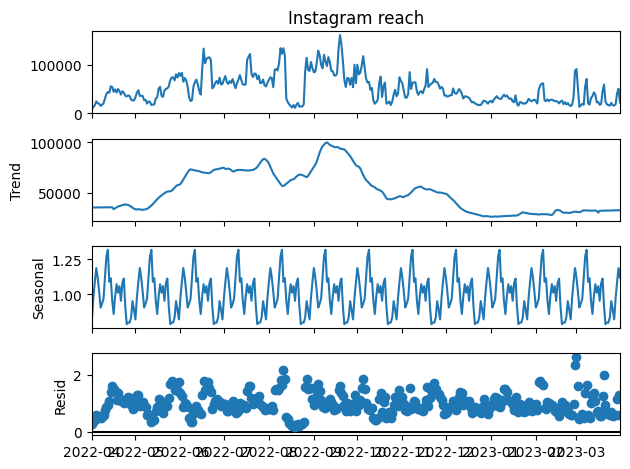

In [63]:
# Trend and Seasonal Analysis
# Period = 30 shows the monthly change in trend
analysis = seasonal_decompose(data['Instagram reach'], model="multiplicative", period=30)
plot = analysis.plot()